In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets,losses
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = tf.pad(X_train,[[0,0],[2,2],[2,2]])/255
X_test = tf.pad(X_test,[[0,0],[2,2],[2,2]])/255

In [5]:
X_train.shape

TensorShape([60000, 32, 32])

In [6]:
X_train = tf.expand_dims(X_train,axis=3,name=None)
X_test = tf.expand_dims(X_test,axis=3,name=None)

In [7]:
X_train.shape

TensorShape([60000, 32, 32, 1])

In [8]:
X_val = X_train[-2000:,:,:,:]
y_val = y_train[-2000:]

X_train = X_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [16]:
X_train.shape

TensorShape([58000, 32, 32, 1])

# Training the model

In [17]:
# AlexNet model


model = Sequential()

# model.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape = (227,227,3))) # original but not work on MNIST
model.add(Conv2D(96,kernel_size=(3,3),strides=1,activation='relu',input_shape = (32,32,1)))
# model.add(MaxPooling2D(pool_size = (3,3),strides=2))    # original
model.add(MaxPooling2D(pool_size = (2,2),strides=2))


# model.add(Conv2D(256,(5,5),activation='relu',padding='same')) # original
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(3,3),strides=2)) # original
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(384,(3,3),padding='same',activation='relu'))

model.add(Conv2D(384,(3,3),padding='same',activation='relu'))


model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=(3,3),strides=2))   # original
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Flatten())

# model.add(Dense(4096,activation='relu'))    # Reducing the no of node according to need
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

# model.add(Dense(4096,activation='relu'))    # Reducing the no of node according to need
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 96)     │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,767,946 (18.19 MB)

 Trainable params: 4,767,946 (18.19 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
histroy = model.fit(X_train,y_train,batch_size=64,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5
907/907 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7812 - loss: 0.6168 - val_accuracy: 0.9925 - val_loss: 0.0327
Epoch 2/5
907/907 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.9809 - loss: 0.0697 - val_accuracy: 0.9905 - val_loss: 0.0383
Epoch 3/5
907/907 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9878 - loss: 0.0464 - val_accuracy: 0.9960 - val_loss: 0.0256
Epoch 4/5
907/907 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9900 - loss: 0.0362 - val_accuracy: 0.9935 - val_loss: 0.0435
Epoch 5/5
907/907 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9920 - loss: 0.0306 - val_accuracy: 0.9930 - val_loss: 0.0291


In [23]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [24]:
y_pred = y_prob.argmax(axis=1)

In [25]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9851 - loss: 0.0599


[0.04808896780014038, 0.9879999756813049]

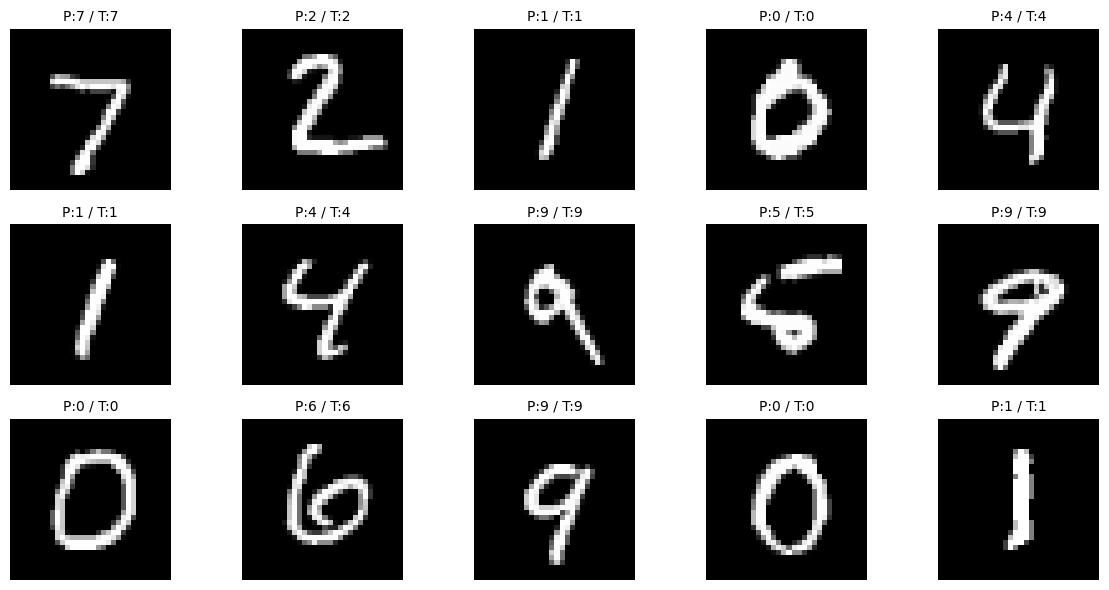

In [35]:
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"P:{y_pred[i]} / T:{y_test[i]}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

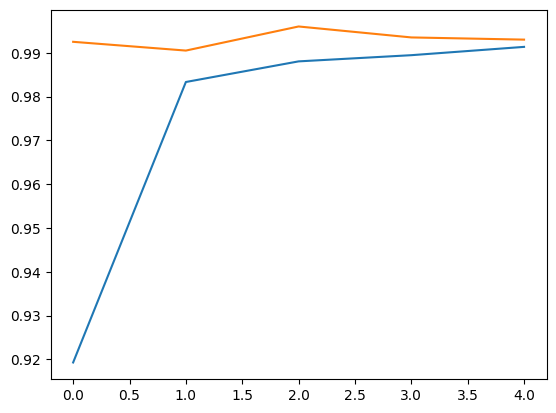

In [39]:

plt.plot(histroy['accuracy'])
plt.plot(histroy['val_accuracy'])

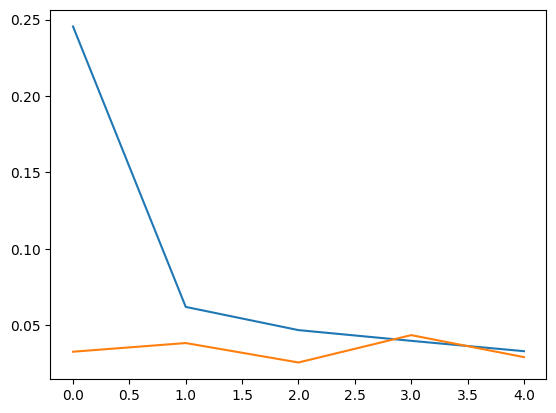

In [40]:
plt.plot(histroy['loss'])
plt.plot(histroy['val_loss'])